# 2D DIVAnd analysis for Synthetic WOD surface layer
Thomas Moore - 24 Feb 2023

In [1]:
using DIVAnd
using PyPlot
using NCDatasets
using DataStructures
using Dates
using Statistics

## Bathymetry

In [2]:
bathname = "../src/data/TMoore-test-input/gebco_30sec_16.nc"

bathisglobal = true

true

## load the `synthetic_wod_2018_all_surface.nc` file

In [3]:
nc_file = "../src/data/TMoore-test-input/synthetic_wod_2018_all_surface.nc"

"../src/data/TMoore-test-input/synthetic_wod_2018_all_surface.nc"

In [4]:
using NCDatasets
ds = Dataset(nc_file)

NCDataset: ../src/data/TMoore-test-input/synthetic_wod_2018_all_surface.nc
Group: /

Dimensions
   index = 112389

Variables
  index   (112389)
    Datatype:    Int64
    Dimensions:  index

  longitude   (112389)
    Datatype:    Float64
    Dimensions:  index
    Attributes:
     _FillValue           = NaN

  latitude   (112389)
    Datatype:    Float64
    Dimensions:  index
    Attributes:
     _FillValue           = NaN

  temp   (112389)
    Datatype:    Float64
    Dimensions:  index
    Attributes:
     _FillValue           = NaN

  depth   (112389)
    Datatype:    Float64
    Dimensions:  index
    Attributes:
     _FillValue           = NaN

  time   (112389)
    Datatype:    String
    Dimensions:  index

  identifier   (112389)
    Datatype:    String
    Dimensions:  index



## grab variables

In [5]:
obslon = ds["longitude"].var[:,:]
obslat = ds["latitude"].var[:,:]
obsval = ds["temp"]

temp (112389)
  Datatype:    Float64
  Dimensions:  index
  Attributes:
   _FillValue           = NaN


## Deal with "FILL_VALUE"

In [6]:
the_array = Array(obsval)
obsval = nomissing(the_array,0.0)

112389-element Vector{Float64}:
 28.575225830078125
 28.578569412231445
 28.67374610900879
 28.567058563232425
 28.622970581054688
 28.69770622253418
 28.74783706665039
 13.765488624572754
 10.630500793457031
 17.537405014038086
 17.145051956176758
 17.002275466918945
 16.620037078857422
  ⋮
 29.749122619628903
 29.59336853027344
 29.586822509765625
 29.58749389648437
 29.590532302856445
 29.227685928344727
 29.291406631469727
 29.354087829589844
 29.3760986328125
 29.393808364868164
 13.765488624572754
 10.630500793457031

In [7]:
typeof(obsval)

Vector{Float64} (alias for Array{Float64, 1})

# check if missing values (NaN) replaced?

In [8]:
nomissing(obsval)

112389-element Vector{Float64}:
 28.575225830078125
 28.578569412231445
 28.67374610900879
 28.567058563232425
 28.622970581054688
 28.69770622253418
 28.74783706665039
 13.765488624572754
 10.630500793457031
 17.537405014038086
 17.145051956176758
 17.002275466918945
 16.620037078857422
  ⋮
 29.749122619628903
 29.59336853027344
 29.586822509765625
 29.58749389648437
 29.590532302856445
 29.227685928344727
 29.291406631469727
 29.354087829589844
 29.3760986328125
 29.393808364868164
 13.765488624572754
 10.630500793457031

In [9]:
minimum(obsval)

0.0

## plot obs locations from synthetic WOD

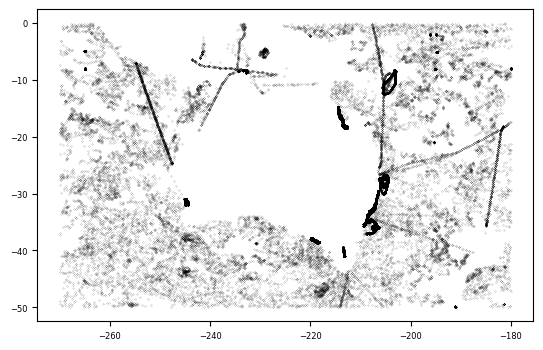

In [10]:
figure("Synth-WOD")
ax = subplot(1,1,1)
plot(obslon, obslat, "ko", markersize=.1, markerfacecolor="k")
aspectratio = 1/cos(mean(obslat) * pi/180)
ax.tick_params("both",labelsize=6)
gca().set_aspect(aspectratio)

## make output grid and mask - coarse 2 degrees

In [11]:
dx = 2 # longitude resolution in degrees
dy = 2 # latitude resolution in degrees

2

In [12]:
lonr = -270.:dx:-180.; # the range of longitudes (start:step:end)
latr = -50.:dy:0.; # the range of latitudes (start:step:end)

In [13]:
bx,by,b = extract_bath(bathname,true,lonr,latr)
@show size(b);

size(b) = (707, 407)


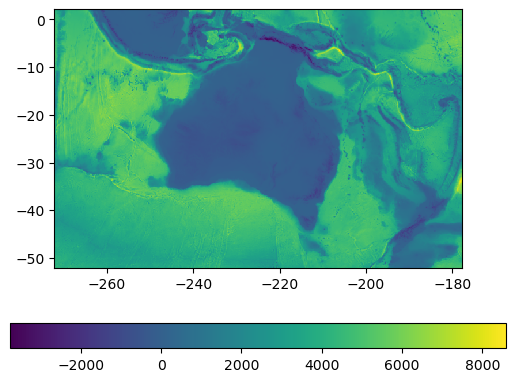

In [14]:
pcolor(bx, by, b'); 
colorbar(orientation="horizontal")
ax = gca()
ax.set_aspect(1/cos(mean([ylim()...]) * pi/180))

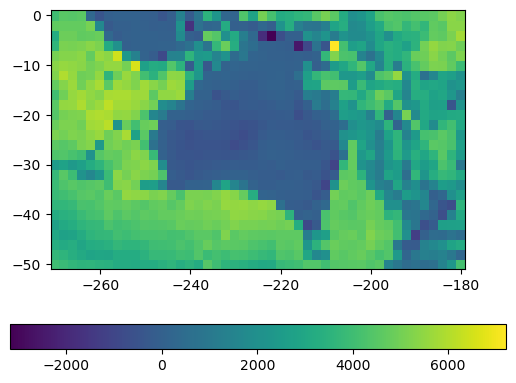

In [15]:
bx,by,b = load_bath(bathname,true,lonr,latr)

pcolor(bx,by,b'); 
colorbar(orientation="horizontal")
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180))

In [24]:
depthr=0
mask = falses(size(b,1),size(b,2),length(depthr))

for k = 1:length(depthr)
    for j = 1:size(b,2)
        for i = 1:size(b,1)
            mask[i,j,k] = b[i,j] >= depthr[k]
        end
    end
end
@show typeof(mask)

typeof(mask) = BitArray{3}


BitArray{3}

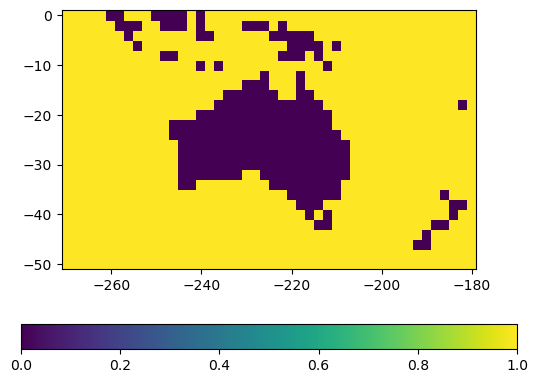

In [25]:
pcolor(bx,by,Float64.(mask[:,:,1]'))
colorbar(orientation="horizontal")
gca().set_aspect(1/cos(mean([ylim()...]) * pi/180)) # fixes the aspect ratio

## set parameters for DIVAnd

In [26]:
epsilon2 = 0.1;

In [27]:
len = (200000.0,200000.0)

(200000.0, 200000.0)

In [28]:
pmn = (0.5,0.5)

(0.5, 0.5)

# RUN DIVAnd

In [29]:
fi, s = DIVAndrun(mask,pmn,(lonr,latr),(obslon,obslat),obsval,len,epsilon2)

LoadError: MethodError: [0mCannot `convert` an object of type 
[0m  [92mFloat64[39m[0m to an object of type 
[0m  [91mArray{Float64}[39m
[0mClosest candidates are:
[0m  convert(::Type{Array{T}}, [91m::StaticArraysCore.SizedArray{S, T, N, M, Array{T, M}}[39m) where {S, T, N, M} at ~/.julia/packages/StaticArrays/jA1zK/src/SizedArray.jl:79
[0m  convert(::Type{Array{T}}, [91m::StaticArraysCore.SizedArray{S, T, N, M, TData} where {N, M, TData<:AbstractArray{T, M}}[39m) where {T, S} at ~/.julia/packages/StaticArrays/jA1zK/src/SizedArray.jl:76
[0m  convert(::Type{T}, [91m::LinearAlgebra.Factorization[39m) where T<:AbstractArray at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/factorization.jl:58
[0m  ...

# Grrrrr - can't parse what this error is saying?  Is an input to the function miss-formatted or miss-typed?  Which one of the inputs is the problem?

## checking the docs for `DIVAnd.DIVAndrun` - https://gher-uliege.github.io/DIVAnd.jl/latest/index.html#API-reference

#### "epsilon2 can be a scalar"

In [30]:
typeof(epsilon2)

Float64

#### len: tuple with n elements. Every element represents the correlation length for a given dimension.

#### dimensions are 2D

In [31]:
typeof(len)

Tuple{Float64, Float64}

#### f: vector of m elements where m is the number of observations

In [32]:
typeof(obsval)

Vector{Float64} (alias for Array{Float64, 1})

In [33]:
length(obsval)

112389

#### x: tuple with n elements. Every element represents a coordinate of the observations.

In [34]:
typeof(obslon)

Vector{Float64} (alias for Array{Float64, 1})

In [35]:
length(obslon)

112389

In [36]:
typeof(obslat)

Vector{Float64} (alias for Array{Float64, 1})

In [37]:
length(obslat)

112389

#### xi: tuple with n elements. Every element represents a coordinate of the final grid on which the observations are interpolated. - these step ranges seems to follow DIVAnd examples?

In [38]:
typeof(latr)

StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}

In [39]:
typeof(lonr)

StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}

#### pmn: scale factor of the grid. pmn is a tuple with n elements. Every element represents the scale factor of the corresponding dimension. Its inverse is the local resolution of the grid in a particular dimension. For example, in two dimensions, pmn is a tuple (pm,pn) where pm is the inverse of the local resolution in first dimension and pn is the the inverse of the local resolution in second dimension.

In [40]:
typeof(pmn)

Tuple{Float64, Float64}

#### mask: binary mask delimiting the domain. true is inside and false outside. - I followed DIVAnd mask building examples?

In [41]:
typeof(mask)

BitArray{3}

# $ The End $